<a href="https://colab.research.google.com/github/xihajun/Keep-learning/blob/master/code/footwear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
os.chdir("./drive/My Drive/")

In [5]:
!mkdir footwear_project

mkdir: cannot create directory ‘footwear_project’: File exists


In [0]:
os.chdir("./footwear_project")

In [7]:
!mkdir -p ./data && cd ./data && wget -O footwear.zip https://github.com/xihajun/Keep-learning/raw/master/data/footwear/footwear.zip

--2019-11-19 21:50:50--  https://github.com/xihajun/Keep-learning/raw/master/data/footwear/footwear.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xihajun/Keep-learning/master/data/footwear/footwear.zip [following]
--2019-11-19 21:50:50--  https://raw.githubusercontent.com/xihajun/Keep-learning/master/data/footwear/footwear.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121524 (119K) [application/zip]
Saving to: ‘footwear.zip’

footwear.zip        100%[===================>] 118.68K  --.-KB/s    in 0.04s   

2019-11-19 21:50:51 (3.11 MB/s) - ‘footwear.zip’ saved [121524/121524]



In [0]:
!unzip ./data/footwear.zip

In [0]:
import numpy as np
import pandas as pd

import os

filelist = []
for dirname, _, filenames in os.walk('./footwear'):
    for filename in filenames:
        filelist.append(os.path.join(dirname,filename))
    break

In [10]:
filelist

['./footwear/y.png', './footwear/x.png', './footwear/z.png']

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import numpy as np
from skimage import io
import warnings

In [0]:
from PIL import ImageTk, Image
for filename in filelist:
    img = Image.open(filename)
    box = (0,0, 240,176)
    region = img.crop(box)
    region.save(filename)

In [0]:
from PIL import Image
I = Image.open('./footwear/y.png')
I.show()
L = I.convert('L')   #转化为灰度图
L = I.convert('1')   #转化为二值化图
L.save('./footwear/z.png')

In [12]:
original = plt.imread(filelist[1])
label = plt.imread(filelist[2])

width, height,depth = original.shape
width, height,depth

(176, 240, 3)

In [0]:
ori = np.array(original.reshape(width,height,depth), dtype=np.float64)
lab = np.array(label.reshape(width,height,1), dtype=np.float64)

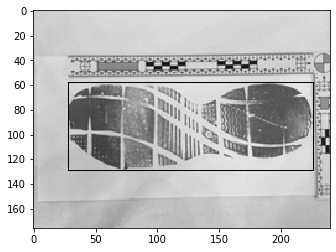

In [14]:
plt.imshow(ori)

In [15]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, UpSampling2D, Cropping2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (2,2), 
                input_shape = (width,height,depth), 
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(32,
                kernel_size = (2,2), 
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(1,
                kernel_size = (2,2), 
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(UpSampling2D(size=(2, 2),
    data_format=None,
    interpolation='nearest'))

model.add(UpSampling2D(size=(2, 2),
    data_format=None,
    interpolation='nearest'))

model.add(UpSampling2D(size=(2, 2),
    data_format=None,
    interpolation='nearest'))
# model.add(Cropping2D(cropping=((7,0),(7,0))))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 176, 240, 32)      416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 88, 120, 32)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 88, 120, 32)       4128      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 44, 60, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 44, 60, 1)         129       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 30, 1)         0         
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 44, 60, 1)        

In [0]:
original_list = []
original_list.append(ori)
original_list.append(ori)

predict_list = []
predict_list.append(lab)
predict_list.append(lab)

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [60]:
model.fit(np.array(original_list),np.array(predict_list),epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 43ms/step - loss: 0.3050
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 0.3036
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 0.3009
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2992
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 0.2971
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 0.2949
Epoch 7/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2932
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.2908
Epoch 9/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2892
Epoch 10/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2872
Epoch 11/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2853
Epoch 12/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2836
Epoch 13/100
2/2 [==============================]

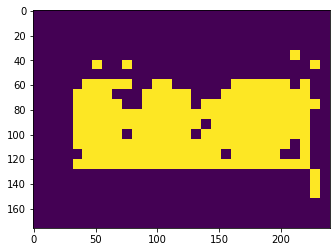

In [61]:
plt.imshow(model.predict_classes(np.array(original_list))[0].reshape(width,height))

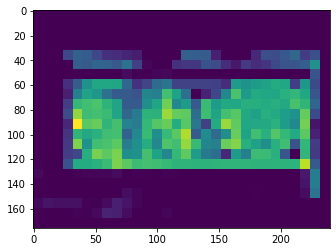

In [62]:
plt.imshow(model.predict(np.array(original_list))[0].reshape(width,height))

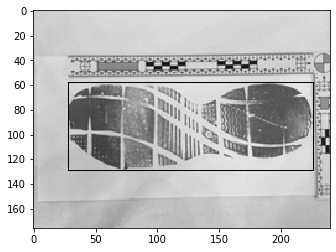

In [63]:
plt.imshow(ori)

In [0]:
img = Image.open('./footwear/test/2.png')
box = (0,0, 240,176)
region = img.crop(box)
region.save('./footwear/test/2.png')

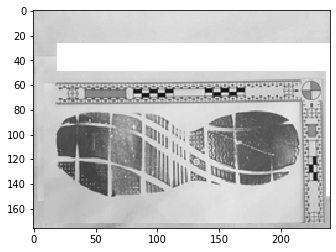

In [65]:
predic = plt.imread('./footwear/test/2.png')
plt.imshow(predic)

(176, 240, 3)

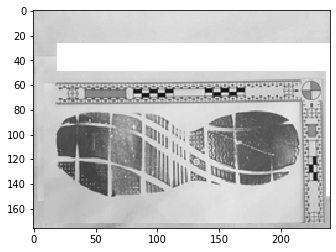

In [66]:

x = np.delete(predic,3, axis = 2)
plt.imshow(x)
x.shape

In [0]:

predict_list = []
predict_list.append(x)
predict_list.append(x)

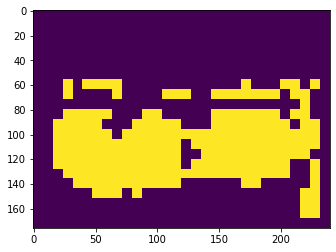

In [68]:
plt.imshow(model.predict_classes(np.array(predict_list))[0].reshape(width,height))

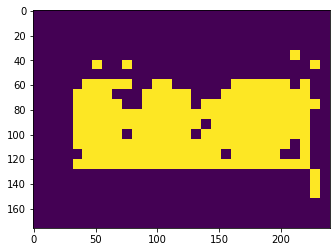

In [69]:
plt.imshow(model.predict_classes(np.array(original_list))[0].reshape(width,height))

In [0]:
def crop_img(filename):
  img = Image.open(filename)
  box = (0,0, 240,176)
  region = img.crop(box)
  region.save(filename)
  pred =  plt.imread(filename)
  x = np.delete(pred, 3, axis = 2)
  predict_list = []
  predict_list.append(x)
  predict_list.append(x)
  return predict_list

In [0]:
pl = crop_img('./footwear/test/3.png')

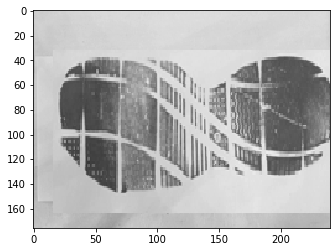

In [75]:
plt.imshow(plt.imread('./footwear/test/3.png'))

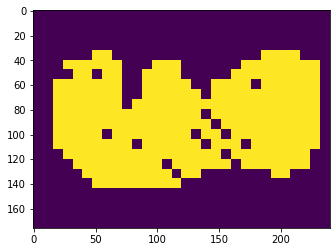

In [73]:
plt.imshow(model.predict_classes(np.array(pl))[0].reshape(width,height))

In [86]:
test.T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [0]:
def find_crop_loc(matrix):
    # matrix is the prediction as above
    # task: find the left point, right point, up point and down point
    d,r = matrix.shape
    u = 0
    for i in matrix:
        u+=1
        if sum(i)!=0:
            break
    for i in reversed(matrix):
        d-=1
        if sum(i)!=0:
            break 
    return u,d

In [0]:
# return up and down and do a matrix transform
up,down = find_crop_loc(test)
left,right = find_crop_loc(test.T)

In [104]:
(l,u,r,d)

(33, 17, 231, 143)

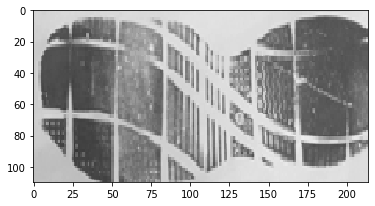

In [106]:
box = (left,up,right,down)
img = Image.open('./footwear/test/3.png')
region = img.crop(box)
tempname = './footwear/temp/temp.png'
region.save(tempname)
plt.imshow(plt.imread(tempname))

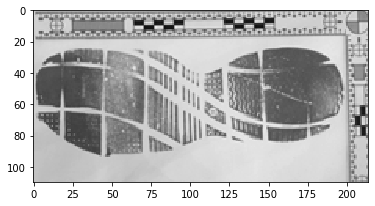

In [107]:
test2 = model.predict_classes(np.array(predict_list))[0].reshape(width,height)
# return up and down and do a matrix transform
up,down = find_crop_loc(test2)
left,right = find_crop_loc(test2.T)
box = (left,up,right,down)
img = Image.open('./footwear/test/2.png')
region = img.crop(box)
tempname = './footwear/temp/temp2.png'
region.save(tempname)
plt.imshow(plt.imread(tempname))

It shows that the result is not really good. Compared with the prediction below, I think maybe preprocess the matrix would be a good choice. 
Idea1: remove the isolated point

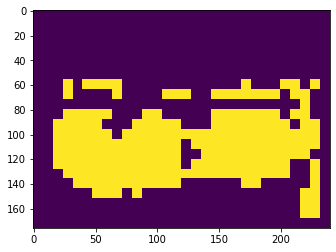

In [108]:
plt.imshow(model.predict_classes(np.array(predict_list))[0].reshape(width,height))

In [0]:
from skimage import io,filters,measure 

Show the labeled image

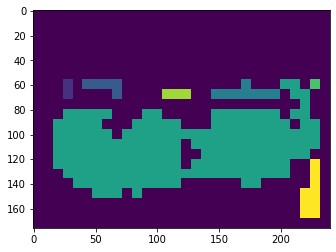

In [159]:
labeled_img, num = measure.label(test2, neighbors=4, background=0, return_num=True)
plt.imshow(labeled_img)

In [0]:
# from: https://blog.csdn.net/ncc1995/article/details/96370275
def largestConnectComponent(bw_img):
    labeled_img, num = measure.label(bw_img, neighbors=4, background=0, return_num=True)
    max_label = 0
    max_num = 0
    for i in range(1, num):
        if np.sum(labeled_img == i) > max_num:
            max_num = np.sum(labeled_img == i)
            max_label = i
    mcr = (labeled_img == max_label)
    return mcr

In [0]:
filtered_array = largestConnectComponent(test2)

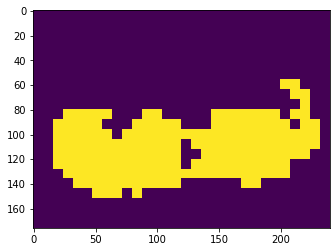

In [160]:
# return up and down and do a matrix transform
up,down = find_crop_loc(filtered_array)
left,right = find_crop_loc(filtered_array.T)
plt.imshow(filtered_array)

In [162]:
box

(17, 57, 231, 151)

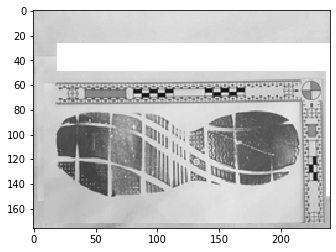

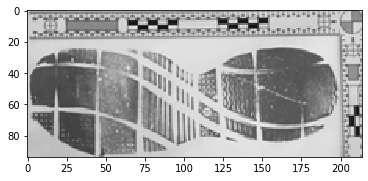

In [163]:
box = (left,up,right,down)
img = Image.open('./footwear/test/2.png')
plt.imshow(plt.imread('./footwear/test/2.png'))
region = img.crop(box)
tempname = './footwear/temp/temp3.png'
region.save(tempname)
plt.figure()
plt.imshow(plt.imread(tempname))

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


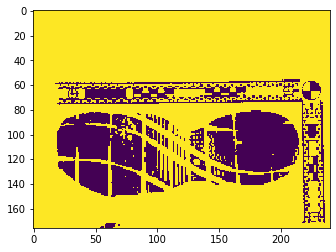

In [129]:
# another way to get bw image, from this image maybe do autoencoder would be better
img = io.imread('./footwear/test/2.png',as_grey=True) #读取图片
thresh = filters.threshold_otsu(img)  #用otsu算法确定最佳分割阈值
bwimg =(img>=(thresh)) 
plt.imshow(bwimg)

In [0]:
def remove_isolated_point():


In [84]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [0]:
!pip install python-resize-image

In [0]:
from resizeimage import resizeimage
filename = '03.jpg'
with open(filename, 'rb') as f:
      with Image.open(f) as image:
          cover = resizeimage.resize_cover(image, [176, 240])
          cover.save(filename, image.format)

In [207]:
width, height

(176, 240)

In [0]:
def resize(filename):
  img = Image.open(filename)
  img = img.resize((240,176))
  img.save(filename)
  x =  plt.imread(filename)
  x = np.delete(x, 3, axis = 2)
  predict_list = []
  predict_list.append(x)
  predict_list.append(x)
  return predict_list

In [0]:
ppp = resize('09.png')